In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as const
import astropy.units as u
import pandas as pd

# Problem 1a: Clayton 5.4

In [47]:
def react_rate(T9, rho, Xi):
    return ((1.15E9 / T9**(2/3)) * Xi**2 * rho**2 * np.exp(-3.380 / T9**(1/3))) / u.cm**3 / u.s

def H_lifetime(rho, Xi, r_H):
    return (const.N_A.value * rho * Xi / u.cm**3) / (2 * r_H)

In [48]:
T9 = .015
rho = 100
Xi = 0.5

r_H = react_rate(T9, rho, Xi)
print(r_H)
time = H_lifetime(rho, Xi, r_H)
print(time.to(u.yr))

52780305.581231326 1 / (cm3 s)
9038888801.885897 yr


# Problem 1b

In [98]:
temps = np.arange(1E-5, 2E-2, 1E-5)

In [99]:
temp = []
for i in range(len(temps)):
    temp.append(((2.4E4 * 3 * 0.5**2 * const.M_sun.cgs.value**2 * np.exp(-3.380 * temps[i]**(-1/3))) / 
                 (4 * np.pi * const.R_sun.cgs.value**3 * const.L_sun.cgs.value * temps[i]**(2/3)) - 1)) 

In [100]:
print(np.where(np.array(temp) < 0))

(array([   0,    1,    2, ..., 1996, 1997, 1998]),)


In [101]:
print(temps[1998])

0.01999


In [ ]:
plt.plot(temps, temp)
plt.show()

# Problem 1c

In [198]:
a = np.arange(0, 5, .01)
Tc9 = .019
val = []

for i in range(len(a)):
    val.append(((a[i] + (2./3.)) * np.log(Tc9)) + (3.38 / Tc9**(1/3)))

In [200]:
print(np.where(np.array(val) < 0))
print(a[253])

(array([253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
       279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
       344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
       357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
       370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
       422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 4

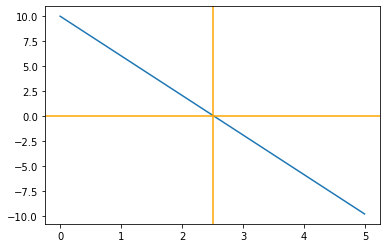

In [202]:
plt.plot(a, val)
plt.axvline(x=2.5, color='orange')
plt.axhline(y=0, color='orange')
plt.show()

# Problem 2a

In [40]:
print(30 * u.MeV / (4. * const.m_p.to(u.g)))

4.483978054917588e+24 MeV / g


# Problem 2b

In [275]:
M = [1 * const.M_sun, 5 * const.M_sun, 10 * const.M_sun]

t_thermal = []

for i in range(len(M)):
    t_thermal.append(((const.G * const.M_sun**4) / (const.R_sun * const.L_sun.to(u.kg * u.m**2 / u.s**3) * M[i]**2)).to(u.yr))

In [276]:
print(t_thermal)

[<Quantity 31399276.76222473 yr>, <Quantity 1255971.07048899 yr>, <Quantity 313992.76762225 yr>]


In [309]:
E_nuc = (4.5E24 * u.MeV / u.g)
M_ms = [1 * const.M_sun, 5 * const.M_sun, 10 * const.M_sun]
t_ms = []

for i in range(len(M)):
    t_ms.append(((E_nuc.si * .1 * const.M_sun.si**3) / (const.L_sun.si * M_ms[i]**2)).to(u.yr))

In [310]:
print(t_ms)

[<Quantity 1.18673273e+10 yr>, <Quantity 4.74693093e+08 yr>, <Quantity 1.18673273e+08 yr>]


# Problem 3

In [204]:
def find_Z(A):
    return ((36.2 * A) / (72.4 + (0.56 * A**(2/3))))

In [313]:
A = np.arange(1, 250, 1)
Z = []

for i in range(len(A)):
    Z.append(find_Z(A[i]))

In [314]:
A_test = [4, 12, 56, 100]
Z_test = []

for i in range(len(A_test)):
    Z_test.append(find_Z(A_test[i]))

print(Z_test)

[1.9617642507813595, 5.7662264775116325, 25.152349391227887, 42.858072611352284]


In [315]:
def binding_energy(A, Z):
    return (-14 * A) + ((18.1 * (A - (2 * Z))**2) / A) + ((0.56 * Z**2) / A**(1/3)) + (13.1 * A**(2/3))

In [316]:
BE_A = []
for i in range(len(A)):
    BE_A.append(-binding_energy(A[i], Z[i]) / A[i])

In [317]:
print(np.max(BE_A))
print(np.where(BE_A==np.max(BE_A)))
print('Proton number for max binding energy:', Z[56])

8.73590449126161
(array([57]),)
Proton number for max binding energy: 25.570630626454623


In [318]:
print(BE_A[0])

0.7610745614035093


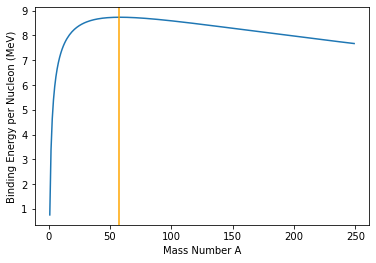

In [14]:
plt.plot(A, BE_A)
plt.axvline(x=57, color='orange')
plt.xlabel('Mass Number A')
plt.ylabel('Binding Energy per Nucleon (MeV)')
plt.show()

In [17]:
be_a_z = pd.read_csv('be_a_z.csv')

print(np.max(be_a_z['bindingEnergy(keV)']))
print(np.where(be_a_z['bindingEnergy(keV)']==np.max(be_a_z['bindingEnergy(keV)'])))
print('Proton number for max binding energy:', be_a_z['z'][574])

8794.5555
(array([574]),)
Proton number for max binding energy: 28


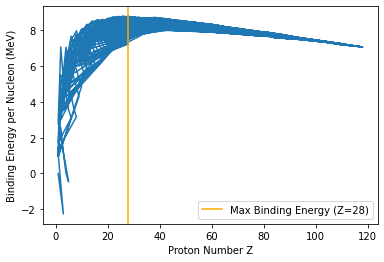

In [21]:
plt.plot(be_a_z['z'], be_a_z['bindingEnergy(keV)'] / 1000)
plt.axvline(x=28, color='orange', label='Max Binding Energy (Z=28)')
plt.xlabel('Proton Number Z')
plt.ylabel('Binding Energy per Nucleon (MeV)')
plt.legend()
plt.show()